# MT-ND5 cis comparison

MT-ND5 (mitochondrially encoded NADH) encodes NADH dehydrogenase 5. This protein is part of complex I which is involved in the transfer of electrons from NADH to ubiquinone and starts the electon transport chain (NIH).

## Step 1: Library Imports

Run this cell to import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import re
import sys 
sys.path.append('C:\\Users\\brittany henderson\\GitHub\\WhenMutationsMatter\\Brittany\\')
import functions as f

import cptac
import cptac.algorithms as al

## Step 2: Find the mutation frequency of MT-ND5 for Ovarian Cancer

In [2]:
ov = cptac.Ovarian()
desired_cutoff = 0.1
gene = 'MT-ND5'

freq_mut = al.get_frequently_mutated(ov, cutoff = desired_cutoff)
freq_mut.loc[freq_mut['Gene'] == gene]

,Gene,Unique_Samples_Mut,Missense_Mut,Truncation_Mut
4,MT-ND5,0.108434,0.084337,0.024096


## Step 3: cis comparisons for omics 

Determine if the DNA mutation has an effect on the omics measurement. In order to do this, we have a few steps in code. These steps are found in the format_cis_comparison_data function.
1. get a table with both the omics and mutation data for tumors
2. get a binary column from the mutation data to separate our samples
3. format data frame to be used in the T-test
4. send data to the T-test.

The format_cis_comparison_data does the first 3 steps.

# Proteomics cis comparison

Proteomics: Mutated and Wildtype

In [3]:
prot_mut_status = f.format_cis_comparison_data(ov, 'proteomics', gene)

prot_col_list = [gene+'_proteomics']
prot_col = gene+"_proteomics"

# Step 4 - T-test comparing means of mutated vs wildtype effect on cis omics
print("Doing t-test comparison\n")
prot_pval_results = al.wrap_ttest(prot_mut_status, 'binary_mutations', prot_col_list)
print(prot_pval_results)

Doing t-test comparison

No significant comparisons.
None


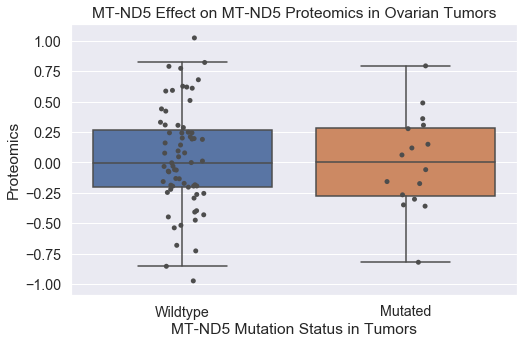

In [4]:
# Step 5 - Create boxplt to compare wildtype and mutated effect on omics data
plt.rcParams['figure.figsize']=(8,5)
sns.set(font_scale = 1.3)
cis_boxplot = sns.boxplot(data = prot_mut_status, x = 'binary_mutations',
                          y = prot_col, order = ["Wildtype","Mutated"], showfliers = False)  
cis_boxplot.set_title(gene + " Effect on " + gene + " Proteomics in Ovarian Tumors")
cis_boxplot = sns.stripplot(data= prot_mut_status, x = 'binary_mutations',
                            y = prot_col,jitter = True, color = ".3", order = ["Wildtype","Mutated"])
cis_boxplot.set(xlabel = gene + " Mutation Status in Tumors", ylabel = "Proteomics")
#cis_boxplot.set_xticklabels(cis_boxplot.get_xticklabels(),rotation = 50)
plt.show()
plt.clf()
plt.close()

Proteomics: Missense and Truncation compared to wildtype

In [5]:
prot_mut_type = f.get_missense_truncation_comparison(ov, 'proteomics', gene)
prot_wildtype = prot_mut_status.loc[prot_mut_status['binary_mutations'] == 'Wildtype'] # select all wildtype from binary_mutations
prot_mut_and_wildtype = prot_mut_type.append(prot_wildtype, sort=False) # use for graph

# compare missense and wildtype
prot_miss_wt = prot_mut_and_wildtype.loc[prot_mut_and_wildtype['binary_mutations'] != 'Truncation']
print("Doing t-test comparison for missense and wildtype\n")
prot_results_miss = al.wrap_ttest(prot_miss_wt, 'binary_mutations', prot_col_list)
print(prot_results_miss)

# compare truncation and wildtype
prot_trunc_wt = prot_mut_and_wildtype.loc[prot_mut_and_wildtype['binary_mutations'] != 'Missense']
print("\n\nDoing t-test comparison for truncation and wildtype\n")
prot_results_trunc = al.wrap_ttest(prot_trunc_wt, 'binary_mutations', prot_col_list)
print(prot_results_trunc)

Doing t-test comparison for missense and wildtype

No significant comparisons.
None


Doing t-test comparison for truncation and wildtype

No significant comparisons.
None


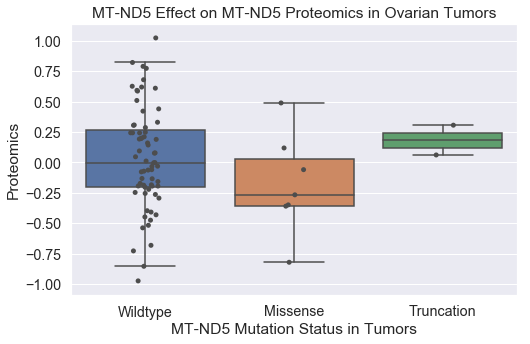

In [6]:
plt.rcParams['figure.figsize']=(8,5)
sns.set(font_scale = 1.3)
prot_cis_boxplot = sns.boxplot(data = prot_mut_and_wildtype, x = 'binary_mutations',
                          y = prot_col, order = ["Wildtype","Missense","Truncation"], showfliers = False)  
prot_cis_boxplot.set_title(gene + " Effect on "+gene+" Proteomics in Ovarian Tumors")
prot_cis_boxplot = sns.stripplot(data= prot_mut_and_wildtype, x = 'binary_mutations',
                            y = prot_col, jitter = True, color = ".3", order = ["Wildtype","Missense","Truncation"])
prot_cis_boxplot.set(xlabel = gene + " Mutation Status in Tumors", ylabel = "Proteomics")
plt.show()
plt.clf()
plt.close()

# Transcriptomics cis comparison

Transcriptomics: Mutated and Wildtype

In [7]:
trans_mut_status = f.format_cis_comparison_data(ov, 'transcriptomics', gene)

Not possible to do T-test. No data for MT-ND5 in transcriptomics


# Phosphoproteomics cis comparison

Phosphoproteomics: Mutated and Wildtype

In [8]:
# Step 1 - Create dataframe in order to do comparisons with wrap_ttest
omics_and_mut = ov.join_omics_to_mutations(
    mutations_genes = gene, omics_df_name = 'phosphoproteomics', omics_genes = gene)


#  Compare common mutations

Find the common mutation types and compare them to the wildtype tumors.

In [9]:
# Count all mutations (including all mutations in a sample)
somatic_mutations = ov.get_mutations()
gene_mutations = somatic_mutations.loc[somatic_mutations['Gene'] == gene]
count_all_mut = gene_mutations['Mutation'].value_counts()
count_all_mut


Missense_Mutation    7
Silent               7
Frame_Shift_Del      1
Frame_Shift_Ins      1
Name: Mutation, dtype: int64

In [10]:
mut = 'Missense_Mutation'
gene_mutations.loc[gene_mutations['Mutation'] == mut]

,Gene,Mutation,Location
Sample_ID,,,
S011,MT-ND5,Missense_Mutation,p.G202D
S022,MT-ND5,Missense_Mutation,p.A458T
S056,MT-ND5,Missense_Mutation,p.F411L
S070,MT-ND5,Missense_Mutation,p.I600V
S100,MT-ND5,Missense_Mutation,p.G179D
S103,MT-ND5,Missense_Mutation,p.I315V
S107,MT-ND5,Missense_Mutation,p.G134D


# Analysis of Results

No significant cis comparisons. No data for MT-ND5 in transcriptomics and phosphoproteomics.

No acetylproteomics for the ovarian dataset.